# Cuestionamiento 3: Existe una relacion entre el exito ($ y ratings) de una pelicula y el director y/o budget?

Data exploration

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [4]:
# Import csv files
movies = pd.read_csv('IMDb movies.csv')
actors = pd.read_csv('IMDb names.csv')
ratings = pd.read_csv('IMDb ratings.csv')
title_principals = pd.read_csv('IMDb title_principals.csv')

In [5]:
movies = pd.DataFrame(movies)
actors = pd.DataFrame(actors)
ratings = pd.DataFrame(ratings)
title_principals = pd.DataFrame(title_principals)

In [6]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [7]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

Cleaning Data

In [8]:
movies = pd.merge(movies,ratings[['imdb_title_id','us_voters_rating','us_voters_votes','non_us_voters_rating','non_us_voters_votes']],on='imdb_title_id',how='left')
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,$ 2250,NaN,NaN,NaN,7.0,7.0,6.0,89.0,6.2,309.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,NaN,NaN,NaN,4.0,2.0,6.2,27.0,6.0,114.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,$ 45000,NaN,NaN,NaN,24.0,3.0,5.5,197.0,4.7,103.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,NaN,NaN,NaN,28.0,14.0,7.1,452.0,7.0,1076.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,NaN,NaN,NaN,NaN,12.0,5.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,NaN,NaN,NaN,NaN,21.0,NaN,5.0,14.0,7.1,45.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,INR 4000000,NaN,$ 4791,NaN,NaN,NaN,NaN,NaN,1.0,3.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,INR 10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [9]:
# Delet columns that we don't need, drop all NaN and reset index
movies = movies.drop(['reviews_from_users','reviews_from_critics','original_title','duration','description'],axis=1)
movies = movies.dropna(how='any')

# Delet budget and gross income in other currencies
movies = movies[~movies['budget'].str.match(r'([A-Z]+)')]
movies = movies[~movies['usa_gross_income'].str.match(r'($[A-Z]+\w)')]
movies = movies[~movies['worlwide_gross_income'].str.match(r'($[A-Z]+\w)')]

# Delet '$' symbol from table
movies['budget'] = movies['budget'].str.replace('$','')
movies['usa_gross_income'] = movies['usa_gross_income'].str.replace('$','')
movies['worlwide_gross_income'] = movies['worlwide_gross_income'].str.replace('$','')

movies = movies.reset_index(drop=True)

movies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,8.5,152716,1500000,19181,32609,99.0,8.5,26265.0,8.5,69116.0
1,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,8.5,197969,1500000,163577,445226,96.0,8.5,28002.0,8.5,92614.0
2,tt0029583,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,7.6,168735,1499000,184925486,184925486,95.0,7.7,37903.0,7.6,70466.0
3,tt0031381,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,8.1,269664,3977000,200852579,402352579,97.0,8.2,63770.0,8.1,108032.0
4,tt0031679,Mr. Smith Goes to Washington,1939,1940-05-03,"Comedy, Drama",USA,English,Frank Capra,"Sidney Buchman, Lewis R. Foster",Columbia Pictures,...,8.1,100206,1900000,144738,144738,73.0,8.3,34275.0,8.0,32212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,tt8772262,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery","USA, Sweden, Hungary","English, Swedish",Ari Aster,Ari Aster,Proton Cinema,...,7.2,78830,10000000,27426361,41123770,72.0,7.5,12466.0,7.1,29604.0
5910,tt9024106,Unplanned,2019,2019-10-04,"Biography, Drama",USA,English,"Chuck Konzelman, Cary Solomon","Abby Johnson, Chuck Konzelman",Unplanned Movie,...,5.8,10783,6000000,19005109,19320481,10.0,6.1,2376.0,4.8,2524.0
5911,tt9082020,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller","France, Ukraine, Belgium","French, English",Frédéric Petitjean,Frédéric Petitjean,Ascot Elite Entertainment Group,...,4.5,2193,2700000,5083,1009888,25.0,4.5,214.0,4.5,1056.0
5912,tt9134216,Playing with Fire,2019,2019-11-08,"Comedy, Family",USA,English,Andy Fickman,"Dan Ewen, Matt Lieberman",Broken Road Productions,...,4.5,1067,29900000,18847824,21788746,24.0,4.7,336.0,4.3,190.0


In [10]:
# Convert budget and gross income to number
movies['budget'] = pd.to_numeric(movies['budget'])
movies['usa_gross_income'] = pd.to_numeric(movies['usa_gross_income'])
movies['worlwide_gross_income'] = pd.to_numeric(movies['worlwide_gross_income'])

# Transform values to k
movies['budget'] = movies['budget']/100
movies['usa_gross_income'] = movies['usa_gross_income']/100
movies['worlwide_gross_income'] = movies['worlwide_gross_income']/100

In [11]:
# Create revenues from income minus budget
revenue_us = movies['usa_gross_income'] - movies['budget']
revenue_ww = movies['worlwide_gross_income'] - movies['budget']

# Add values to dataframe
movies['revenue_usa'] = revenue_us
movies['revenue_worlwide'] = revenue_ww

# Display preview of new columns
movies[['title','budget','usa_gross_income','worlwide_gross_income','revenue_usa','revenue_worlwide']]

,title,budget,usa_gross_income,worlwide_gross_income,revenue_usa,revenue_worlwide
0,City Lights,15000.0,191.81,326.09,-14808.19,-14673.91
1,Modern Times,15000.0,1635.77,4452.26,-13364.23,-10547.74
2,Snow White and the Seven Dwarfs,14990.0,1849254.86,1849254.86,1834264.86,1834264.86
3,Gone with the Wind,39770.0,2008525.79,4023525.79,1968755.79,3983755.79
4,Mr. Smith Goes to Washington,19000.0,1447.38,1447.38,-17552.62,-17552.62
...,...,...,...,...,...,...
5909,Midsommar,100000.0,274263.61,411237.70,174263.61,311237.70
5910,Unplanned,60000.0,190051.09,193204.81,130051.09,133204.81
5911,Cold Blood Legacy,27000.0,50.83,10098.88,-26949.17,-16901.12
5912,Playing with Fire,299000.0,188478.24,217887.46,-110521.76,-81112.54


Summary stats

In [64]:
budget = movies['budget']
budget_quartiles = budget.quantile([.25,.5,.75])
budget_lowerq = budget_quartiles[0.25]
budget_upperq = budget_quartiles[0.75]
budget_iqr = budget_upperq - budget_lowerq
budget_lower_bound = budget_lowerq - (1.5 * budget_iqr)
budget_upper_bound = budget_upperq + (1.5 * budget_iqr)

usrevenue = movies['revenue_usa']
usrevenue_quartiles = usrevenue.quantile([.25,.5,.75])
usrevenue_lowerq = usrevenue_quartiles[0.25]
usrevenue_upperq = usrevenue_quartiles[0.75]
usrevenue_iqr = usrevenue_upperq - usrevenue_lowerq
usrevenue_lower_bound = usrevenue_lowerq - (1.5 * usrevenue_iqr)
usrevenue_upper_bound = usrevenue_upperq + (1.5 * usrevenue_iqr)

wwrevenue = movies['revenue_worlwide']
wwrevenue_quartiles = wwrevenue.quantile([.25,.5,.75])
wwrevenue_lowerq = wwrevenue_quartiles[0.25]
wwrevenue_upperq = wwrevenue_quartiles[0.75]
wwrevenue_iqr = wwrevenue_upperq - wwrevenue_lowerq
wwrevenue_lower_bound = wwrevenue_lowerq - (1.5 * wwrevenue_iqr)
wwrevenue_upper_bound = wwrevenue_upperq + (1.5 * wwrevenue_iqr)

usratings = movies['us_voters_rating']
usratings_quartiles = usratings.quantile([.25,.5,.75])
usratings_lowerq = usratings_quartiles[0.25]
usratings_upperq = usratings_quartiles[0.75]
usratings_iqr = usratings_upperq - usratings_lowerq
usratings_lower_bound = usratings_lowerq - (1.5 * usratings_iqr)
usratings_upper_bound = usratings_upperq + (1.5 * usratings_iqr)

wwratings = movies['avg_vote']
wwratings_quartiles = wwratings.quantile([.25,.5,.75])
wwratings_lowerq = wwratings_quartiles[0.25]
wwratings_upperq = wwratings_quartiles[0.75]
wwratings_iqr = wwratings_upperq - wwratings_lowerq
wwratings_lower_bound = wwratings_lowerq - (1.5 * wwratings_iqr)
wwratings_upper_bound = wwratings_upperq + (1.5 * wwratings_iqr)

test = movies.loc[
   ( (budget_lower_bound < movies['budget']) | ( movies['budget'] < budget_upper_bound) ) &
   ( (usrevenue_lower_bound < movies['revenue_usa']) | (movies['revenue_usa'] < usrevenue_upper_bound) ) &
   ( (wwrevenue_lower_bound < movies['revenue_worlwide']) | (movies['revenue_worlwide'] < wwrevenue_upper_bound) ) &   ( (usratings_lower_bound < movies['us_voters_rating']) | (movies['us_voters_rating'] < usratings_upper_bound) ) &   ( (wwratings_lower_bound < movies['avg_vote']) | (movies['avg_vote'] < wwratings_upper_bound) )
]



# outliers_budget = budget.loc[(budget < budget_lower_bound) | (budget > budget_upper_bound)]
# outliers_usrevenue = usrevenue.loc[(usrevenue < usrevenue_lower_bound) | (usrevenue > usrevenue_upper_bound)]
# outliers_wwrevenue = wwrevenue.loc[(wwrevenue < wwrevenue_lower_bound) | (wwrevenue > wwrevenue_upper_bound)]
# outliers_usratings = usratings.loc[(usratings < usratings_lower_bound) | (usratings > usratings_upper_bound)]
# outliers_wwratings = wwratings.loc[(wwratings < wwratings_lower_bound) | (wwratings > wwratings_upper_bound)]

# outliers_wwratings
# test = movies.loc(outliers_budget & outliers_usrevenue)

test

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,...,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,revenue_usa,revenue_worlwide
0,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,15000.0,191.81,326.09,99.0,8.5,26265.0,8.5,69116.0,-14808.19,-14673.91
1,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,15000.0,1635.77,4452.26,96.0,8.5,28002.0,8.5,92614.0,-13364.23,-10547.74
2,tt0029583,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,14990.0,1849254.86,1849254.86,95.0,7.7,37903.0,7.6,70466.0,1834264.86,1834264.86
3,tt0031381,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,39770.0,2008525.79,4023525.79,97.0,8.2,63770.0,8.1,108032.0,1968755.79,3983755.79
4,tt0031679,Mr. Smith Goes to Washington,1939,1940-05-03,"Comedy, Drama",USA,English,Frank Capra,"Sidney Buchman, Lewis R. Foster",Columbia Pictures,...,19000.0,1447.38,1447.38,73.0,8.3,34275.0,8.0,32212.0,-17552.62,-17552.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,tt8772262,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery","USA, Sweden, Hungary","English, Swedish",Ari Aster,Ari Aster,Proton Cinema,...,100000.0,274263.61,411237.70,72.0,7.5,12466.0,7.1,29604.0,174263.61,311237.70
5910,tt9024106,Unplanned,2019,2019-10-04,"Biography, Drama",USA,English,"Chuck Konzelman, Cary Solomon","Abby Johnson, Chuck Konzelman",Unplanned Movie,...,60000.0,190051.09,193204.81,10.0,6.1,2376.0,4.8,2524.0,130051.09,133204.81
5911,tt9082020,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller","France, Ukraine, Belgium","French, English",Frédéric Petitjean,Frédéric Petitjean,Ascot Elite Entertainment Group,...,27000.0,50.83,10098.88,25.0,4.5,214.0,4.5,1056.0,-26949.17,-16901.12
5912,tt9134216,Playing with Fire,2019,2019-11-08,"Comedy, Family",USA,English,Andy Fickman,"Dan Ewen, Matt Lieberman",Broken Road Productions,...,299000.0,188478.24,217887.46,24.0,4.7,336.0,4.3,190.0,-110521.76,-81112.54


In [21]:
# Group data base by director and count movies
director = movies.groupby('director')
director_movies = movies['director'].value_counts()

# General information of database
directors = len(movies['director'].unique())
max_year = movies['year'].max()
min_year = movies['year'].min()
max_movie = director_movies.max()
min_budget = movies['budget'].min()
min_budget

0.2

In [13]:
# Stats information of budget
director_budget_sum = director['budget'].sum()
director_budget_mean = director['budget'].mean()
director_budget_median = director['budget'].median()
director_budget_var = director['budget'].var()
director_budget_sem = director['budget'].sem()

# # Stats information of revenue in us
director_usrevenue_sum = director['revenue_usa'].sum()
director_usrevenue_mean = director['revenue_usa'].mean()
director_usrevenue_median = director['revenue_usa'].median()
director_usrevenue_var = director['revenue_usa'].var()
director_usrevenue_sem = director['revenue_usa'].sem()

# Stats information of revenue worldwide
director_wwrevenue_sum = director['revenue_worlwide'].sum()
director_wwrevenue_mean = director['revenue_worlwide'].mean()
director_wwrevenue_median = director['revenue_worlwide'].median()
director_wwrevenue_var = director['revenue_worlwide'].var()
director_wwrevenue_sem = director['revenue_worlwide'].sem()

# Stats information of ratings in us
director_usratings_sum = director['us_voters_rating'].sum()
director_usratings_mean = director['us_voters_rating'].mean()
director_usratings_median = director['us_voters_rating'].median()
director_usratings_var = director['us_voters_rating'].var()
director_usratings_sem = director['us_voters_rating'].sem()

# Stats information of ratings worldwide
director_wwratings_sum = director['avg_vote'].sum()
director_wwratings_mean = director['avg_vote'].mean()
director_wwratings_median = director['avg_vote'].median()
director_wwratings_var = director['avg_vote'].var()
director_wwratings_sem = director['avg_vote'].sem()

Generate plots

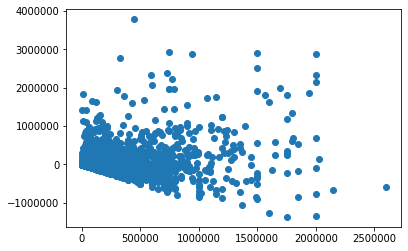

In [24]:
# US Budget vs revenue
plt.scatter(director_budget_mean,director_usrevenue_mean)
plt.show()


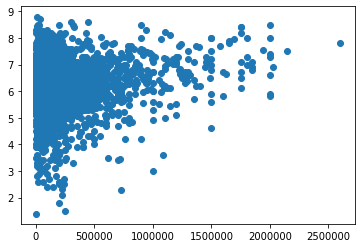

In [23]:
# US budget vs ratings
plt.scatter(director_budget_mean,director_usratings_mean)
plt.show()